In [1]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
alpha_data = pd.read_csv('./A-Z_characters/A_Z Handwritten Data.csv')
alpha_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = alpha_data['0']

In [8]:
letter_dict = {0:'A',1:'B',2:'C',3:'D',4:'E', 5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',
                 15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:"V",22:'W',23:'X',24:'Y',25:'Z'}

In [7]:
alpha_data.dtypes

0        int64
0.1      int64
0.2      int64
0.3      int64
0.4      int64
         ...  
0.644    int64
0.645    int64
0.646    int64
0.647    int64
0.648    int64
Length: 785, dtype: object

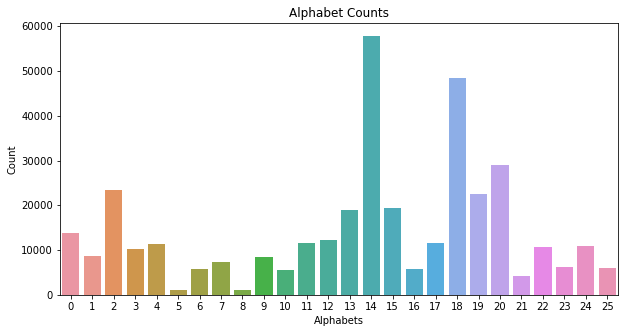

In [10]:
plt.figure(figsize = (10,5))
fig = sns.countplot(y)
plt.xlabel("Alphabets")
plt.ylabel("Count")
plt.title("Alphabet Counts") 
plt.show(fig)

In [11]:
# undersampling
nM = NearMiss()
X_data, y_data = nM.fit_sample(alpha_data.iloc[:,1:], y)

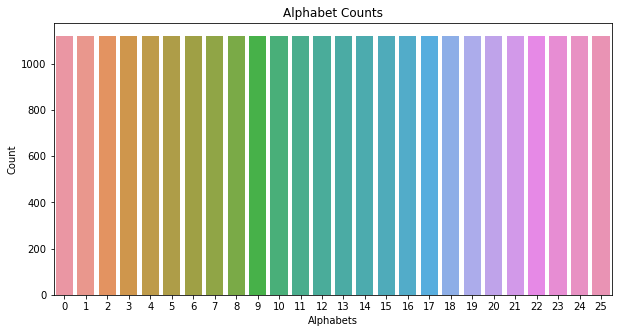

In [12]:
plt.figure(figsize = (10,5))
fig = sns.countplot(y_data)
plt.xlabel("Alphabets")
plt.ylabel("Count")
plt.title("Alphabet Counts")
plt.show(fig)

In [13]:
lB = LabelBinarizer()
y = lB.fit_transform(y_data)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [14]:
X_data = X_data / 255
X_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X_data = np.array(X_data)

In [16]:
X_data = X_data.reshape(-1,28,28,1)

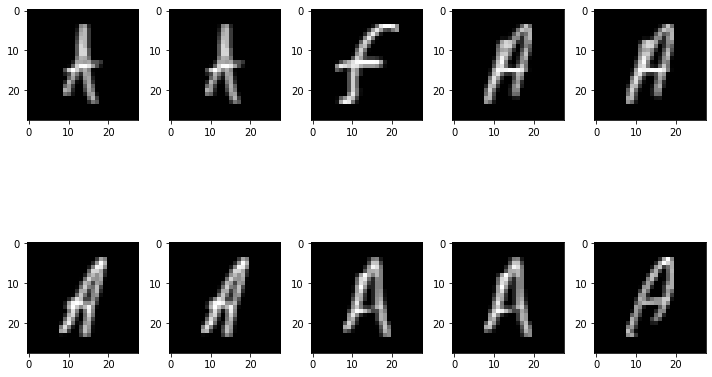

In [17]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape, X_test.shape, X_valid.shape, y_train.shape, y_test.shape, y_valid.shape)

(18636, 28, 28, 1) (5824, 28, 28, 1) (4660, 28, 28, 1) (18636, 26) (5824, 26) (4660, 26)


In [22]:
model = Sequential()
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))


model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 26 , activation = 'softmax'))


In [30]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [26]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)        

In [27]:
history = model.fit(X_train,y_train, batch_size = 64 ,epochs = 5 , 
                    validation_data = (X_valid, y_valid) , 
                    callbacks = [learning_rate_reduction])

Train on 18636 samples, validate on 4660 samples
Epoch 1/5
18636/18636 [==============================] - 214s 11ms/sample - loss: 0.1548 - acc: 0.9574 - val_loss: 0.2457 - val_acc: 0.9253
Epoch 2/5
18636/18636 [==============================] - 226s 12ms/sample - loss: 0.0877 - acc: 0.9748 - val_loss: 0.1402 - val_acc: 0.9700
Epoch 3/5
18636/18636 [==============================] - 214s 11ms/sample - loss: 0.0727 - acc: 0.9785 - val_loss: 0.1091 - val_acc: 0.9710
Epoch 4/5
18636/18636 [==============================] - 211s 11ms/sample - loss: 0.0749 - acc: 0.9789 - val_loss: 0.1199 - val_acc: 0.9747
Epoch 5/5
18636/18636 [==============================] - 217s 12ms/sample - loss: 0.0446 - acc: 0.9885 - val_loss: 0.1093 - val_acc: 0.9775


In [28]:
model.save('./Models/Alpharecmodel.h5')
print("Saving the model as Alpharecmodel.h5")

Saving the model as Alpharecmodel.h5


KeyError: 'accuracy'

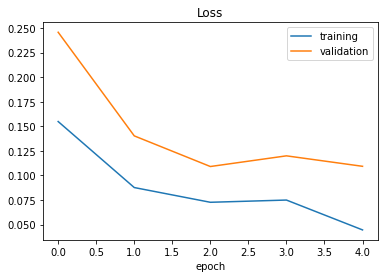

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [33]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.1287726358839611
Test Accuracy = 0.9737294


In [34]:
predictions = model.predict_classes(X_test)
predictions[:5] 

array([ 0, 21, 14,  0,  6], dtype=int64)

In [35]:
y_test[0:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]])

In [75]:
# list(letter_dict.values())

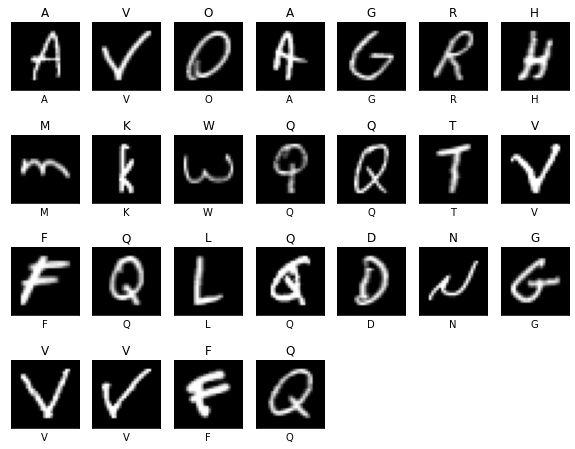

In [41]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(list(letter_dict.values())[np.argmax(y_test[i])])
    plt.xlabel(list(letter_dict.values())[predictions[i]])
plt.show()

In [43]:
len(model.predict(X_valid))

4660

In [76]:
from tensorflow.keras.models import load_model

In [77]:
model = load_model('./Models/Alpharecmodel.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [49]:
# img = cv2.imread('./Test_images/A.png')
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

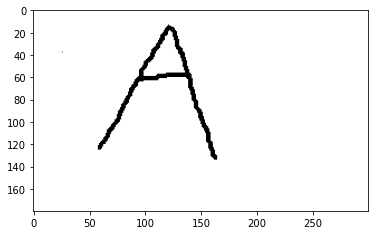

In [142]:
from PIL import Image
img = Image.open('./Test_images/A.png')
plt.imshow(img)

In [143]:
img = img.resize((28,28))
# convert rgb to grayscale
img = img.convert('L')
img = np.array(img)
# reshaping to support our model input and normalizing
img = img.reshape(1,28,28,1)
img = img/255.0

In [144]:
letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
print(letters, sep=' ')

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [145]:
model.predict(img)

array([[4.0677902e-11, 4.9893208e-20, 6.5452539e-24, 7.0989757e-18,
        1.2544128e-16, 9.9980801e-01, 2.6905043e-13, 2.6107299e-11,
        5.9367934e-29, 8.1066003e-34, 8.7117934e-18, 1.2725218e-36,
        1.9686535e-11, 3.0047245e-19, 1.8014212e-04, 6.9108083e-27,
        1.5580613e-07, 1.0123181e-17, 2.2331411e-21, 6.1586456e-33,
        1.3286325e-18, 1.1791636e-05, 4.5097874e-17, 3.0298131e-21,
        1.1801746e-32, 1.1606592e-25]], dtype=float32)

In [146]:
letters[np.argmax(model.predict(img))]

'F'

'F'